# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Jasleen | Badhesha | Signature | Hours | Contribution |
| Member 2: | Negar | Raika | Signature | Hours | Contribution |
| Member 3: | Deep | Patel | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

#mounting google drive so we can access the data files
from google.colab import drive
drive.mount('/content/drive')

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

Mounted at /content/drive


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [3]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [4]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [5]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
#  .shape[0] returns rows and [1] returns column numbers
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [6]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [7]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

#print(y) to make sure that was done properly

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [8]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [10]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [12]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
     ('scaler', StandardScaler()),
     ('classifier', SVC(kernel = 'rbf'))
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [13]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None], #these are the options for scalerr
    'classifier__C': [0.01, 0.1, 1 ,10, 100], #this tunes parameter C
    'classifier__gamma': [0.001, 0.01, 0.1, 1], #this tunes the parameters for gamma
}

In [14]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [15]:
# TODO: Print the results from the grid search
# (2 marks)

#calculating the best cross-validation training score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

training_scores = cross_val_score(grid, X_train, y_train, cv=KFold(n_splits=2, shuffle=True, random_state=42)) #n_splits=2 because more than this took too long to load
best_training_score = max(training_scores)

#calculating the best cross-validation test score
test_scores = cross_val_score(grid, X_test, y_test, cv=KFold(n_splits=2, shuffle=True, random_state=42))
best_test_score = max(test_scores)

#calculating the test-set accuracy score and then printing it
from sklearn.metrics import accuracy_score
y_test_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

#printing the best parameters, best test and training cross-validation scores, and the test-set scores
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(best_training_score))
print("Best cross-validation test score: {:.2f}".format(best_test_score))
print("Test-set score: {:.2f}".format(test_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'scaler': RobustScaler()}

Best cross-validation train score: 0.94
Best cross-validation test score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

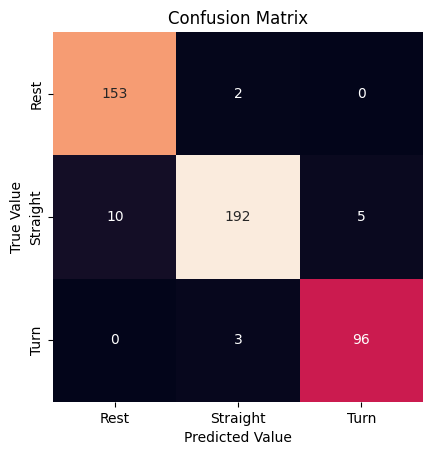


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [17]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
#import the necessary packages
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Creating the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

#Below code prints confusion matrix using a heatmap
#print(grid.classes_) #print this to figure out what the labels should be

sns.heatmap(conf_mat, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers

1.
-

2.  
-

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [18]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 =test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [19]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

In [20]:
#building the model for test_set1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)
grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid1.fit(X1_train, y1_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

In [21]:
#building the model for test_set2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2)
grid2 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid2.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

For each test dataset, print the test set accuracy score.

In [22]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
#accuracies for test_set1
y1_test_pred = grid1.best_estimator_.predict(X1_test)
test_accuracy1 = accuracy_score(y1_test, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))

#accuracies for test_set2
y2_test_pred = grid2.best_estimator_.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

test_set1 score: 0.94
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

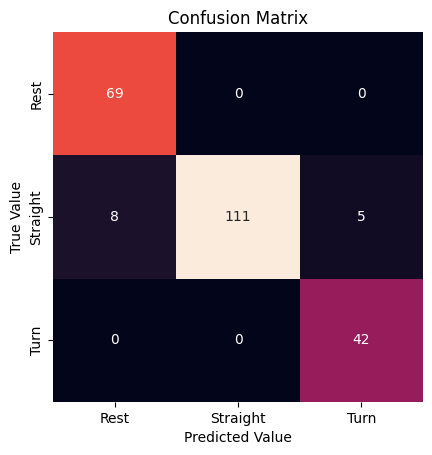


Classification Report:
              precision    recall  f1-score   support

        rest       0.90      1.00      0.95        69
    straight       1.00      0.90      0.94       124
        turn       0.89      1.00      0.94        42

    accuracy                           0.94       235
   macro avg       0.93      0.97      0.94       235
weighted avg       0.95      0.94      0.94       235



In [23]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

#Creating the confusion matrix
conf_mat1 = confusion_matrix(y1_test, y1_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat1, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y1_test, y1_test_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

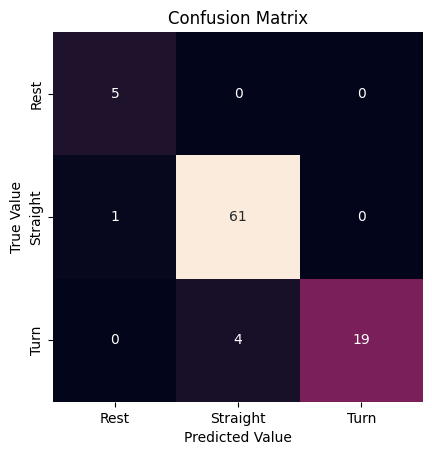


Classification Report:
              precision    recall  f1-score   support

        rest       0.83      1.00      0.91         5
    straight       0.94      0.98      0.96        62
        turn       1.00      0.83      0.90        23

    accuracy                           0.94        90
   macro avg       0.92      0.94      0.92        90
weighted avg       0.95      0.94      0.94        90



In [24]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
#Creating the confusion matrix
conf_mat2 = confusion_matrix(y2_test, y2_test_pred)

#Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat2, xticklabels=['Rest', 'Straight', 'Turn'],  yticklabels= ['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#Creating the classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_test_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1.
1.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [25]:
# TODO - Load selected features from cv_set to X
# (1 marks
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [26]:
# TODO - Load motion_state column (target vector) into y
target_column = 'motion_state'
y = cv_set[target_column]

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [27]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.ensemble import RandomForestClassifier
y_selected = cv_set[target_column]
X_selected = cv_set[selected_features]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected,
    test_size=0.30,         # 30% of the data for testing
    random_state=42,        # For reproducibility
    stratify=y_selected    # To maintain class distribution in both sets
)

pipe_selected = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler as the first step
    ('classifier', RandomForestClassifier(random_state=42))  # RandomForest as the classifier
])

param_grid_selected = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'classifier__n_estimators': [100, 200, 300],        # Number of trees in RandomForest
    'classifier__max_depth': [10, 20, 30, None],         # Maximum depth of trees
    'classifier__min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]            # Minimum samples required at a leaf node
}

grid_selected = GridSearchCV(
    estimator=pipe_selected,      # The pipeline defined with scaler and classifier
    param_grid=param_grid_selected, # The parameter grid defined earlier
    cv=5,                         # 5-fold cross-validation
    scoring='accuracy',           # Use accuracy as the scoring metric
    return_train_score=True,      # Store training scores
    verbose=2,                    # Optional: Increase verbosity to see progress
    n_jobs=-1                     # Use all available processors
)

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [28]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification reports

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [29]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
y1_test_pred = grid1.best_estimator_.predict(X1_test)
test_accuracy1 = accuracy_score(y1_test, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))
#print("test_set2 score: {:.2f}".format(???))
y2_test_pred = grid2.best_estimator_.predict(X2_test)
test_accuracy2 = accuracy_score(y2_test, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

test_set1 score: 0.94
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

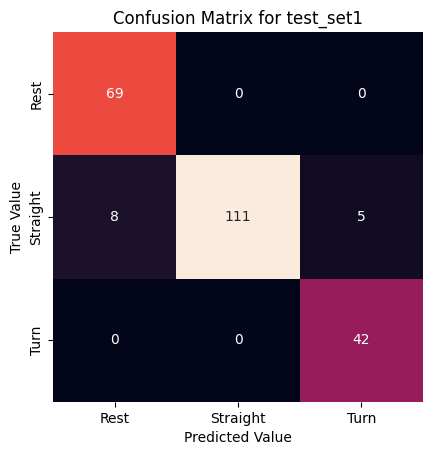

In [30]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

conf_mat1 = confusion_matrix(y1_test, y1_test_pred)
# Plot confusion matrix
sns.heatmap(conf_mat1, xticklabels=['Rest', 'Straight', 'Turn'], yticklabels=['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for test_set1')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      1.00      0.95        69
    straight       1.00      0.90      0.94       124
        turn       0.89      1.00      0.94        42

    accuracy                           0.94       235
   macro avg       0.93      0.97      0.94       235
weighted avg       0.95      0.94      0.94       235



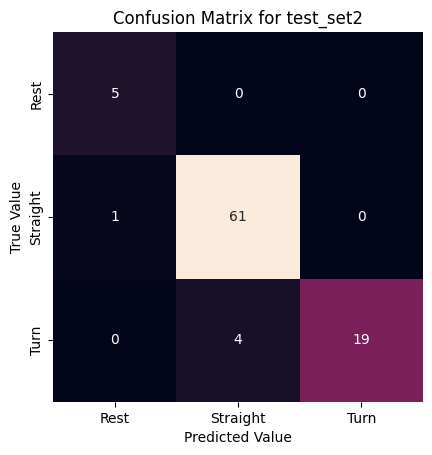


Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.83      1.00      0.91         5
    straight       0.94      0.98      0.96        62
        turn       1.00      0.83      0.90        23

    accuracy                           0.94        90
   macro avg       0.92      0.94      0.92        90
weighted avg       0.95      0.94      0.94        90



In [31]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

print("\nClassification Report for test_set1:")
print(classification_report(y1_test, y1_test_pred))

# For test_set2 (X2, y2)
conf_mat2 = confusion_matrix(y2_test, y2_test_pred)
# Plot confusion matrix
sns.heatmap(conf_mat2, xticklabels=['Rest', 'Straight', 'Turn'], yticklabels=['Rest', 'Straight', 'Turn'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for test_set2')
plt.show()

# Print classification report for test_set2
print("\nClassification Report for test_set2:")
print(classification_report(y2_test, y2_test_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.
2.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [32]:
# TODO - Load group selected features from cv_set to X
# X =
selected_features = [col for col in cv_set.columns if col != 'motion_state']
X = cv_set[selected_features]
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [33]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']
print(y.head(10))

0        rest
1        rest
2    straight
3        turn
4        turn
5        turn
6        turn
7        turn
8        turn
9        turn
Name: motion_state, dtype: object


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [34]:
# TODO - Perform model training and tuning using `GridSearchCV`
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling step
    ('classifier', SVC())          # Support Vector Classifier step
])

# Define the parameter grid to search over for hyperparameter tuning
param_grid = {
    'scaler': [StandardScaler(), None],  # Test scaling or no scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter for SVC
    'classifier__gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient for SVC
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the grid search model on the data
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [35]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

print("Best Parameters:\n{}".format(grid.best_params_))
best_train_score = grid.best_score_
print("Best cross-validation train score: {:.2f}".format(best_train_score))

validation_scores = cross_val_score(grid, X_test, y_test, cv=5, scoring='accuracy')
best_validation_score = max(validation_scores)
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))

y_test_pred = grid.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test-set accuracy: {:.2f}".format(test_accuracy))

Best Parameters:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'scaler': RobustScaler()}
Best cross-validation train score: 0.95
Best cross-validation validation score: 0.98
Test-set accuracy: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

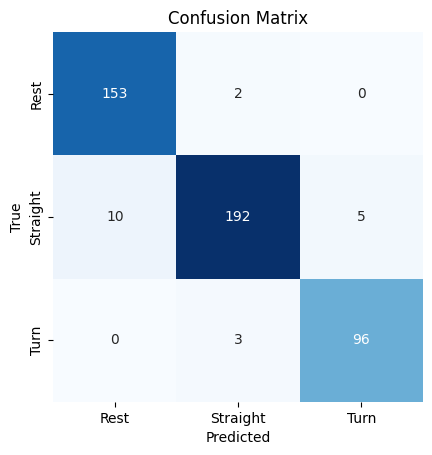


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [36]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.best_estimator_.predict(X_test)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)

# Visualizing the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Rest', 'Straight', 'Turn'], yticklabels=['Rest', 'Straight', 'Turn'], square=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [37]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
selected_features = [col for col in test_set1.columns if col != 'motion_state']
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [38]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [39]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid1.fit(X1_train, y1_train)
y1_test_pred = grid1.best_estimator_.predict(X1)
test_accuracy1 = accuracy_score(y1, y1_test_pred)
print("test_set1 score: {:.2f}".format(test_accuracy1))

# Predict on test_set2 and calculate accuracy
grid2 = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid2.fit(X2_train, y2_train)
y2_test_pred = grid2.best_estimator_.predict(X2)
test_accuracy2 = accuracy_score(y2, y2_test_pred)
print("test_set2 score: {:.2f}".format(test_accuracy2))

test_set1 score: 0.96
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

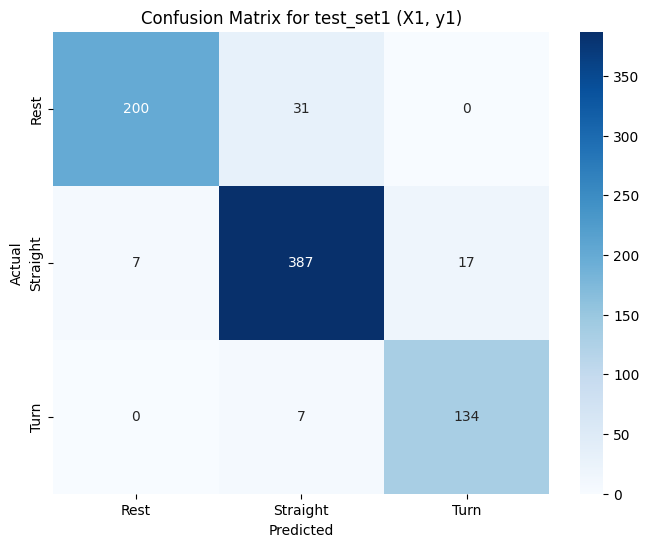


Classification Report for test_set1 (X1, y1):
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [40]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.best_estimator_.predict(X1)

# Confusion Matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Rest', 'Straight', 'Turn'], yticklabels=['Rest', 'Straight', 'Turn'])
plt.title("Confusion Matrix for test_set1 (X1, y1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report for test_set1 (X1, y1):")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

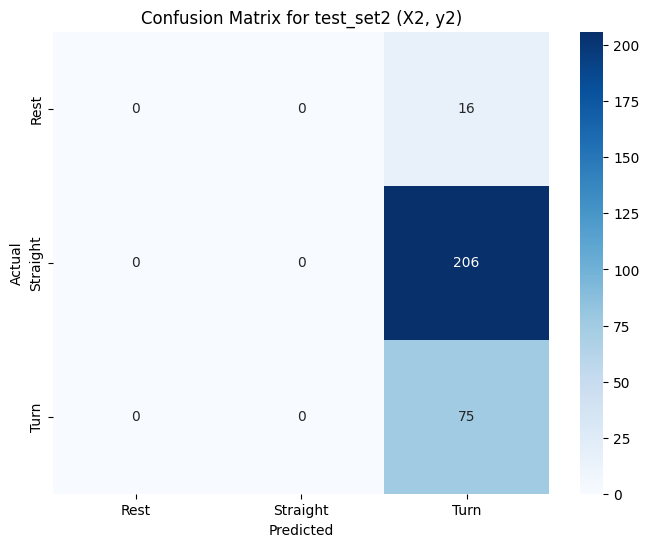


Classification Report for test_set2 (X2, y2):
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)

# Confusion Matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Rest', 'Straight', 'Turn'], yticklabels=['Rest', 'Straight', 'Turn'])
plt.title("Confusion Matrix for test_set2 (X2, y2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report for test_set2 (X2, y2):")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [42]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [43]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [53]:
# Perform any missing imports
from sklearn.decomposition import PCA
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
      ('pca', PCA()),
    ('classifier', SVC())         # SVC as the classifier
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [54]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Options for data scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1] ,
    'pca__n_components': [4, 7, 11, 14, 16]# Kernel coefficient
}

In [55]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'pca__n_components': [4, 7, 11, 14, 16],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [56]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

# Print the best parameters found by GridSearchCV
print("Best params:\n{}".format(grid.best_params_))

# Print the best cross-validation train score
best_train_score = grid.best_score_
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Get the best cross-validation test score
# We can retrieve the best test score from the grid search by using the validation scores
# Use the mean test score from the grid search results
best_validation_score = max(grid.cv_results_['mean_test_score'])
print("Best cross-validation validation score: {:.2f}".format(best_validation_score))

# Evaluate the model on the test set
test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'pca__n_components': 14, 'scaler': RobustScaler()}
Best cross-validation train score: 0.94
Best cross-validation validation score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

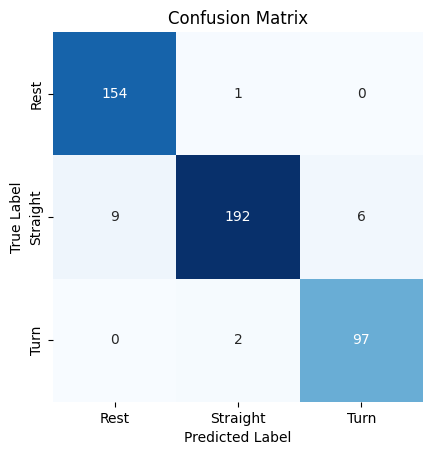

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.93      0.96       207
        turn       0.94      0.98      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.97      0.96       461
weighted avg       0.96      0.96      0.96       461



In [57]:
# TODO - Display confusion matrix and print classification report

y_pred = grid.best_estimator_.predict(X_test)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rest', 'Straight', 'Turn'],
            yticklabels=['Rest', 'Straight', 'Turn'],
            square=True, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____